In [ ]:
# PENGINGAT: LEMBAR INI MERUPAKAN LEMBAR CONTOH DAN BUKAN LEMBAR KERJA
# UNTUK LEMBAR KERJA SILAHKAN DI DUPLIKAT TERLEBIH DAHULU DENGAN CARA KLIK "FILE", KEMUDIAN KLIK "SAVE A COPY IN DRIVE"
# TERIMA KASIH

In [ ]:
!pip install numpy==1.23.5
!pip install Cython==0.29.36
!pip install pandas==1.5.3
!pip install pmdarima==2.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 48.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
bigframes 2.1.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
pymc 5.

In [ ]:
##Step 1: Import Library yang Diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [ ]:
##Step 2: Load dan Persiapan Data
# Load the Excel file
file_path = "/content/Contoh Hubungan Tingkat Demokrasi dengan Pengeluaran Belanja Militer Canada.xlsx"
xls = pd.ExcelFile(file_path)

# Membaca sheet pertama
df = pd.read_excel(xls, sheet_name="Sheet1")

# Memfilter data untuk Canada
df_canada = df[df["Entity"] == "Canada"].copy()

# Mengatur indeks berdasarkan tahun
df_canada.set_index("Year", inplace=True)
df_canada.index = pd.to_datetime(df_canada.index, format='%Y')

# Menampilkan beberapa baris pertama
print(df_canada.head())

FileNotFoundError: [Errno 2] No such file or directory: '/Content/Hubungan Tingkat Demokrasi dan pengluaran Militer India.xlsx'

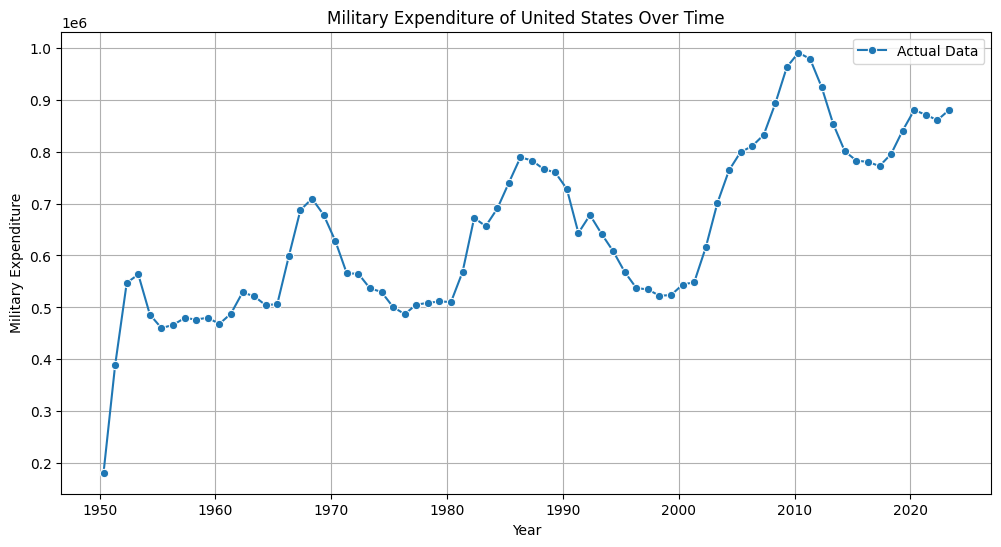

In [ ]:
##Step 3: Visualisasi Data Awal
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_canada.index, y=df_canada["Military expenditure"], marker="o", label="Actual Data")
plt.title("Military Expenditure of United States Over Time")
plt.xlabel("Year")
plt.ylabel("Military Expenditure")
plt.grid(True)
plt.show()

In [ ]:
## Step 4: Uji Stasioneritas dengan ADF Test
# Uji stasioneritas dengan Augmented Dickey-Fuller Test
adf_test = adfuller(df_canada["Military expenditure"])
adf_p_value = adf_test[1]

# Jika p-value > 0.05, data tidak stasioner dan perlu differencing
print(f"ADF Test p-value: {adf_p_value}")

# Menerapkan differencing pertama jika perlu
df_canada["Military expenditure diff"] = df_canada["Military expenditure"].diff()

# Uji ulang setelah differencing
adf_test_diff = adfuller(df_canada["Military expenditure diff"].dropna())
adf_p_value_diff = adf_test_diff[1]

print(f"ADF Test p-value after differencing: {adf_p_value_diff}")

ADF Test p-value: 0.9461930166076534
ADF Test p-value after differencing: 8.4997963365317e-06


In [ ]:
##Step 5: Menentukan Model ARIMA Optimal
# Menentukan model ARIMA dengan auto_arima
best_arima = auto_arima(df_canada["Military expenditure"], seasonal=False, trace=True, stepwise=True)
order = best_arima.order  # Mendapatkan (p, d, q) terbaik
print(f"Optimal ARIMA Order: {order}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1750.013, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1788.324, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1750.241, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1756.517, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1789.047, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1748.581, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1746.920, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1747.991, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1749.010, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=1749.710, Time=1.33 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=1745.392, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1755.280, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1747.024, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[0]             : AIC=1746.393, Time=0.82 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1747.364, Time=1.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,0)[0]             : AIC=1748.043, Time=1.16 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0]          
Total fit time: 6.381 seconds
Optimal ARIMA Order: (0, 1, 2)


In [ ]:
##Step 6: Melatih Model ARIMA
model = ARIMA(df_canada["Military expenditure"], order=order)
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                SARIMAX Results                                 
Dep. Variable:     Military expenditure   No. Observations:                   74
Model:                   ARIMA(0, 1, 2)   Log Likelihood                -869.696
Date:                  Thu, 17 Apr 2025   AIC                           1745.392
Time:                          14:13:03   BIC                           1752.263
Sample:                               0   HQIC                          1748.130
                                   - 74                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7229      0.065     11.146      0.000       0.596       0.850
ma.L2          0.3966      0.111      3.558      0.000       0.178       0.615
sigma2      1.147e+09   1.22e-11   9

In [ ]:
# Menentukan jumlah tahun yang akan diprediksi
forecast_years = 4
forecast_index = pd.date_range(start=df_America.index[-1] + pd.DateOffset(years=1), periods=forecast_years, freq='Y')

# Menggunakan get_forecast() untuk mendapatkan nilai prediksi dan confidence intervals
forecast_result = model_fit.get_forecast(steps=forecast_years)
forecast_values = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Extract lower and upper bounds from conf_int
lower_bound = conf_int['lower Military expenditure'] # Access lower bound for 'Military expenditure'
upper_bound = conf_int['upper Military expenditure'] # Access upper bound for 'Military expenditure'


# Menampilkan hasil prediksi dalam bentuk tabel dengan Lower Bound dan Upper Bound
forecast_df_America = pd.DataFrame({
    "Year": forecast_index,
    "Military expenditure": forecast_values,
    "Lower Bound": lower_bound,
    "Upper Bound": upper_bound
})

print(forecast_df_America)

         Year  Military expenditure    Lower Bound   Upper Bound
74 2024-12-31         900847.836430  834473.365887  9.672223e+05
75 2025-12-31         911044.591712  778823.212037  1.043266e+06
76 2026-12-31         911044.591712  717984.973573  1.104104e+06
77 2027-12-31         911044.591712  672169.019354  1.149920e+06


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


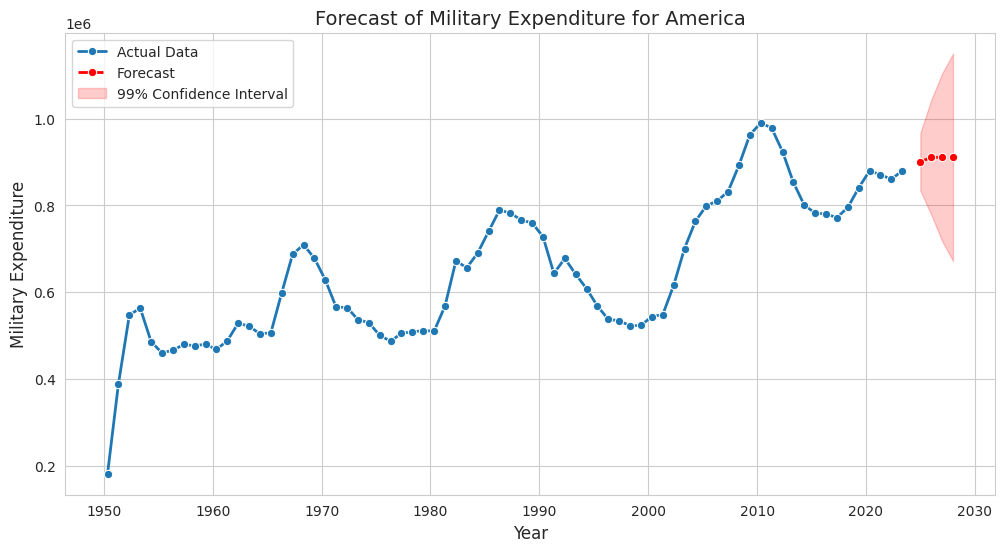

In [ ]:
##Step 8: Visualisasi Hasil Forecasting
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Plot data historis
sns.lineplot(x=df_America.index, y=df_America["Military expenditure"], marker="o", label="Actual Data", linewidth=2)

# Plot prediksi dengan confidence intervals
sns.lineplot(x=forecast_index, y=forecast_values, marker="o", linestyle="dashed", color="red", label="Forecast", linewidth=2)

# Access the confidence intervals directly using column names
# Instead of using array slicing, access the columns by their names
plt.fill_between(forecast_index, conf_int["lower Military expenditure"], conf_int["upper Military expenditure"], color='red', alpha=0.2, label="99% Confidence Interval")

# Pengaturan plot
plt.title("Forecast of Military Expenditure for America", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Military Expenditure", fontsize=12)
plt.legend()
plt.show()

In [ ]:
##Step 9: Evaluasi Model dengan RMSE dan MAPE
# Membagi data menjadi train-test
train_size = int(len(df_canada) * 0.8)
train, test = df_canada.iloc[:train_size], df_canada.iloc[train_size:]

history = np.array(train["Military expenditure"], dtype=float)
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=order)
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history = np.append(history, test["Military expenditure"].iloc[t])

# Menghitung RMSE dan MAPE
rmse = np.sqrt(mean_squared_error(test["Military expenditure"], predictions))
mape = mean_absolute_percentage_error(test["Military expenditure"], predictions) * 100

print(f"Rolling Forecast RMSE: {rmse:.4f}")
print(f"Rolling Forecast MAPE: {mape:.2f}%")

Rolling Forecast RMSE: 22441.1491
Rolling Forecast MAPE: 2.14%


In [ ]:
##Step 10: Menyimpan Hasil Forecast ke File Excel
output_file = "/content/Military_expenditure_Canada.xlsx"
forecast_df_canada.to_excel(output_file, index=False)

print(f"File saved at: {output_file}")

File saved at: /content/Military_expenditure_United States.xlsx
